<a href="https://colab.research.google.com/github/BheezPen/NewsTextClassifierUsingNLP/blob/main/Habeeblah_Aberejo_DSNInternshipCodingAssessment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Project Starts Here

This is a DSN (Data Science Nigeria) Internship Coding Challenge!

This assessment put my Natural Language Processing (NLP) and problem-solving abilities to the test. :

- Build a text classification model.
- Ran all of the cells in your notebook and the output visible.

### Dataset

This is the news [dataset](https://drive.google.com/file/d/1NgPM7_mFCDKnuqI9SamMCrkF1mE5AgAI/view?usp=sharing) i used which contains 2225 examples of news articles with their respective labels.

## Starting Here

### Task

**This is to test my knowledge on NLP**

i Built and train a machine learning model with the provided dataset to classify the news category or topic. I am allowed to use any architecture or model, in the test.

**It's compulsory i plot the accuracy vs epochs and loss vs epochs graphs**

In [1]:
# Code to read the csv dataset file into Colaboratory from my gogle drive
!pip install -U -q PyDrive

from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials


# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)


MessageError: ignored

In [ ]:
#dataset link after reuploading to my own drive
link = 'https://drive.google.com/file/d/1cM8PWrleKS6_BOaUKqx61ZvCOHQrHYw-/view?usp=sharing'


# to get the id part of the file for access
id = link.split("/")[-2]

downloaded = drive.CreateFile({'id':id})
downloaded.GetContentFile('bbc-text.csv')




In [ ]:
import pandas as pd

# Load the dataset
df = pd.read_csv('bbc-text.csv')



# Display the first few rows of the dataset
heading = df.head()
print(heading)


        category                                               text
0           tech  tv future in the hands of viewers with home th...
1       business  worldcom boss  left books alone  former worldc...
2          sport  tigers wary of farrell  gamble  leicester say ...
3          sport  yeading face newcastle in fa cup premiership s...
4  entertainment  ocean s twelve raids box office ocean s twelve...


In [ ]:
import re
import nltk
nltk.download('stopwords')
nltk.download('punkt')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Define the stop words
stop_words = set(stopwords.words('english'))
custom_stop_words = {'and', 'in', 'or', 'as', 'we', 'a'}
stop_words.update(custom_stop_words)

# Function to clean the text
def clean_text(text):
    # Remove commas
    text = text.replace(',', '')

    # Tokenize the text
    tokens = word_tokenize(text)

    # Remove stop words and single characters
    filtered_tokens = [word.lower() for word in tokens if word.lower() not in stop_words and len(word) > 1]

    # Join the filtered tokens back into a single string
    cleaned_text = ' '.join(filtered_tokens)

    return cleaned_text

# Clean the text column
df['cleaned_text'] = df['text'].apply(clean_text)



X = df['cleaned_text']#df['text'].values
y = df['category'].values

#printing to be sure the cleaning was fine
print(X)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


0       tv future hands viewers home theatre systems p...
1       worldcom boss left books alone former worldcom...
2       tigers wary farrell gamble leicester say rushe...
3       yeading face newcastle fa cup premiership side...
4       ocean twelve raids box office ocean twelve cri...
                              ...                        
2220    cars pull us retail figures us retail sales fe...
2221    kilroy unveils immigration policy ex-chatshow ...
2222    rem announce new glasgow concert us band rem a...
2223    political squabbles snowball become commonplac...
2224    souness delight euro progress boss graeme soun...
Name: cleaned_text, Length: 2225, dtype: object


['tech' 'business' 'sport' 'entertainment' 'politics']





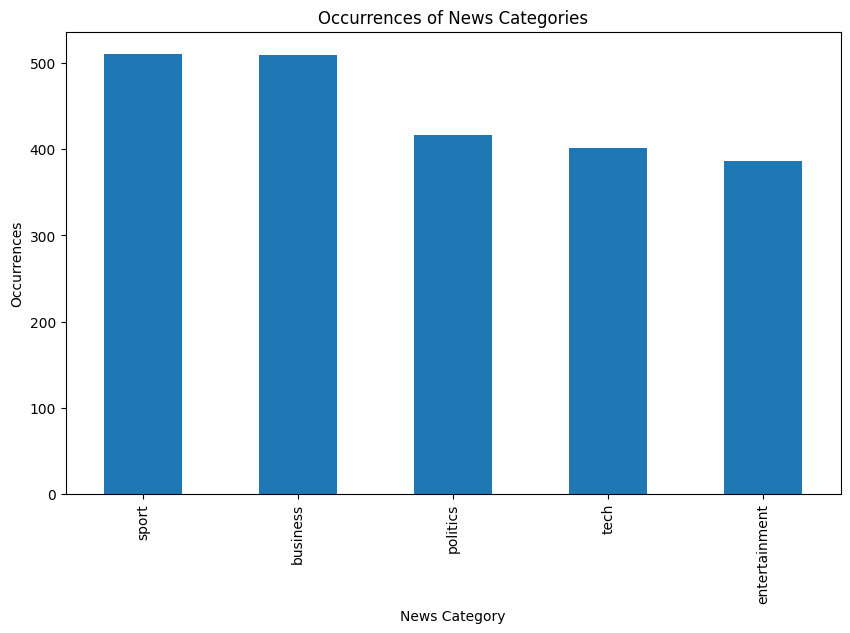

From the graph above as related to the dataset, the cetagory sport occure in 511 time
From the graph above as related to the dataset, the cetagory business occure in 510 time
From the graph above as related to the dataset, the cetagory politics occure in 417 time
From the graph above as related to the dataset, the cetagory tech occure in 401 time
From the graph above as related to the dataset, the cetagory entertainment occure in 386 time


In [ ]:
#This print the number of unique category that exist in the dataset
#THe number of unique category will later serve as the value for the variable 'num_classess'
print(df['category'].unique())
print('\n\n')



#TO get the right number of classes in the dataset, (ie, the number of different category of news) esisting on the dataset
#Will plot the category agaist its number of occurence

import matplotlib.pyplot as plt

# Count the occurrences of each news category
category_counts = df['category'].value_counts()

# Plot the occurrences
plt.figure(figsize=(10, 6))
category_counts.plot(kind='bar')
plt.xlabel('News Category')
plt.ylabel('Occurrences')
plt.title('Occurrences of News Categories')
plt.show()


for category, count in category_counts.items():
    print(f'From the graph above as related to the dataset, the cetagory {category} occure in {count} time')

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# printing the shapes of the new X objects
print(X_train.shape)
print(X_test.shape)

# printing the shapes of the new y objects
print(y_train.shape)
print(y_test.shape)

(1780,)
(445,)
(1780,)
(445,)


In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Tokenize the text
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)

# Convert text to sequences
X_train_sequences = tokenizer.texts_to_sequences(X_train)
X_test_sequences = tokenizer.texts_to_sequences(X_test)

# Pad the sequences
max_sequence_length = 200  # Set the desired sequence length
X_train_padded = pad_sequences(X_train_sequences, maxlen=max_sequence_length, padding='post', truncating='post')
X_test_padded = pad_sequences(X_test_sequences, maxlen=max_sequence_length, padding='post', truncating='post')


In [ ]:
from sklearn.preprocessing import LabelEncoder

# Encode the labels
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)


In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)

# Retrieve the vocabulary size
vocab_size = len(tokenizer.word_index) + 1

X_train_sequences = tokenizer.texts_to_sequences(X_train)


vocab_size = len(tokenizer.word_index) + 1

print(vocab_size)

26809


In [ ]:
import tensorflow as tf

vocab_size = 26896
embedding_dim = 250
num_classes = 5
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=max_sequence_length),
    tf.keras.layers.LSTM(64, return_sequences=True),
    tf.keras.layers.LSTM(64),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(num_classes, activation='softmax')
])

model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


In [ ]:
#Trainging the model

epochs = 10
batch_size = 64

history = model.fit(X_train_padded, y_train_encoded, epochs=epochs, batch_size=batch_size,
                    validation_data=(X_test_padded, y_test_encoded))


Epoch 1/10
28/28 [==============================] - 31s 810ms/step - loss: 1.5318 - accuracy: 0.2787 - val_loss: 1.3700 - val_accuracy: 0.3506
Epoch 2/10
28/28 [==============================] - 19s 668ms/step - loss: 1.2075 - accuracy: 0.3983 - val_loss: 1.2651 - val_accuracy: 0.3640
Epoch 3/10
28/28 [==============================] - 20s 731ms/step - loss: 1.1187 - accuracy: 0.4848 - val_loss: 1.0471 - val_accuracy: 0.5191
Epoch 4/10
28/28 [==============================] - 21s 747ms/step - loss: 1.0147 - accuracy: 0.5618 - val_loss: 0.9700 - val_accuracy: 0.6157
Epoch 5/10
28/28 [==============================] - 21s 751ms/step - loss: 0.8670 - accuracy: 0.6416 - val_loss: 0.9011 - val_accuracy: 0.5393
Epoch 6/10
28/28 [==============================] - 21s 758ms/step - loss: 0.8023 - accuracy: 0.6539 - val_loss: 0.6954 - val_accuracy: 0.7236
Epoch 7/10
28/28 [==============================] - 19s 693ms/step - loss: 0.7058 - accuracy: 0.7309 - val_loss: 0.6999 - val_accuracy: 0.7371

In [ ]:
_, test_accuracy = model.evaluate(X_test_padded, y_test_encoded)

print(f'Test Accuracy: {test_accuracy}')


14/14 [==============================] - 1s 100ms/step - loss: 0.6324 - accuracy: 0.6876
Test Accuracy: 0.6876404285430908


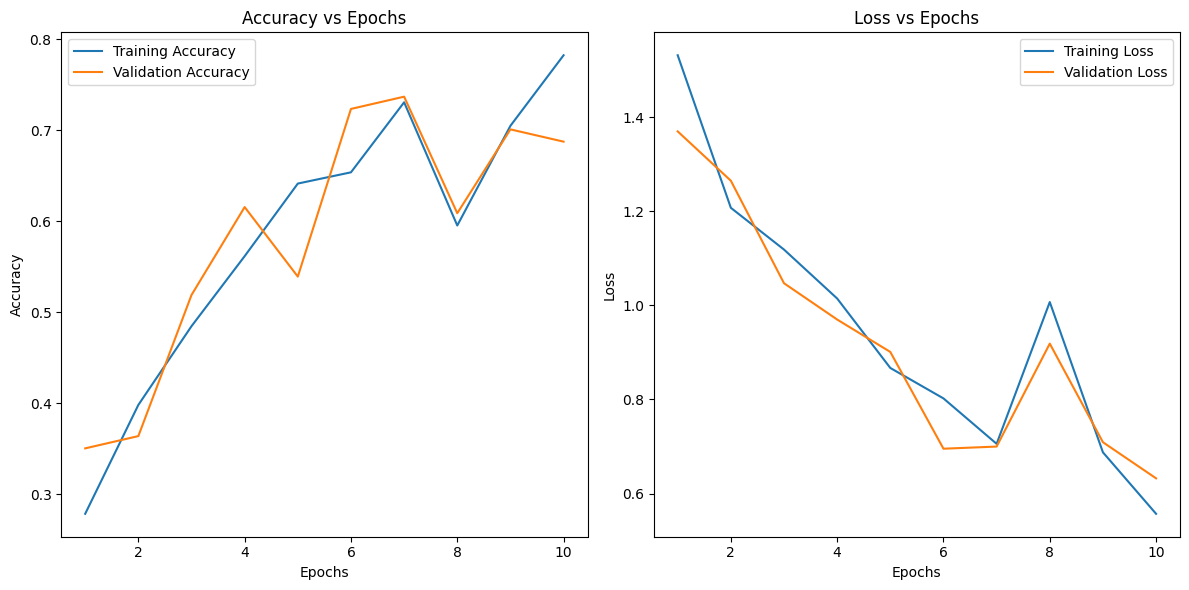

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(range(1, epochs + 1), history.history['accuracy'], label='Training Accuracy')
plt.plot(range(1, epochs + 1), history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Epochs')
plt.legend()

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(range(1, epochs + 1), history.history['loss'], label='Training Loss')
plt.plot(range(1, epochs + 1), history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss vs Epochs')
plt.legend()

plt.tight_layout()
plt.show()


In [ ]:
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import string

def preprocess_headline(headline):
    # Lowercase the headline
    headline = headline.lower()

    # Remove punctuation
    #headline = headline.translate(str.maketrans('', '', string.punctuation))

    # Additional preprocessing steps (e.g., removing stopwords, stemming, etc.)
    # Define the stop words
    #headline = set(stopwords.words('english'))
    #custom_stop_words = {'and', 'in', 'or', 'as', 'we', 'a'}
    #headline.update(custom_stop_words)

    return headline

list_of_news = ['President Tinubu receives President Biden of America in Lagos over security discursion',
                'Ukraine counter-offensive will be long and bloody, says US Gen Mark Milley',
                'US Supreme Court strikes down student loan forgiveness plan',
                "But the most painful was the huge reversal in fee income, unheard of among private sector lenders. \
                Essentially, it means that Yes Bank took it for granted that fees on structured loan deals will \
                be paid and accounted for upfront on its books. As borrowers turned defaulters, the fees tied to \
                these loan deals fell off the cracks. Gill has now vowed to shift to a safer accounting practice \
                of amortizing fee income rather than booking these upfront.",
                "Gill’s move to mend past ways means that there will be no nasty surprises in the future. \
                This is good news considering that investors love a clean image and loathe uncertainties.",
                "But there is no gain without pain and the promise of a strong and stable balance sheet comes \
                with some sacrifices as well. Investors will have to give up the hopes of phenomenal growth, a promise made by Kapoor.",
                "How formidable is the opposition alliance among Congress, Jharkhand Mukti Morcha (JMM) and Jharkhand Vikas Morcha (Prajatantrik)?",
                "Most Asian currencies were trading lower today. South Korean won was down 0.4%, China renminbi 0.23%, China Offshore 0.15%, \
                Malaysian ringgit 0.12%, Indonesian rupiah 0.11%, Taiwan dollar 0.06%. However, Japanese yen was up 0.32%.",
                "The dollar index, which measures the US currency’s strength against major currencies, was trading at 97.26,\
                down 0.14% from its previous close of 97.395.",
                "If you want to answer any question, click on ‘Answer’. After clicking on Answer you can also check out replies of other users. \
                Proceed to Answer either through writing or voice command.",
                "If you want to ask any question, click on “Ask A Question. Few question prefixes are already inserted to help you with your questions. \
                After submitting your question, the app will send the questions to your neighbours and will let you know how many neighbours",
                "Thursday's announcement comes as Huawei Technologies Ltd., the world's biggest maker of network gear for phone companies, \
                combats US warnings the company might be a security risk.",
                "Mumbai: India Inc's external commercial borrowings (ECBs) fell by 45% to $2.42 billion in January 2019 as compared to the year-ago period, \
                data from the Reserve Bank of India (RBI) has showed.",
                "Domestic firms had raised $5.40 billion from overseas sources during January 2018. Of the total borrowings during the month, \
                $2.27 billion was raised through the automatic route of external commercial borrowings (ECBs). The remaining $150 million was\
                taken through the approval route, according to RBI data on ECB for January 2019.",
                "On Wednesday, Federal Reserve Chairman Jerome Powell said interest rates could be on hold for some time as global risks weigh \
                on the economic outlook and inflation remains muted.",
                "The python programming langugae is shown on the large television when building an automation scripts for new technology",
                "Not for sale, stictly technology",
                "Davido and Ed Sheeran danced and sang all through the day at the hotel"]


# Function to clean the text
def clean_text(text):
    # Remove commas
    text = text.replace(',', '')

    # Tokenize the text
    tokens = word_tokenize(text)

    # Remove stop words and single characters
    filtered_tokens = [word.lower() for word in tokens if word.lower() not in stop_words and len(word) > 1]

    # Join the filtered tokens back into a single string
    cleaned_text = ' '.join(filtered_tokens)

    return cleaned_text


cleaned_news = [clean_text(new) for new in list_of_news]

print(cleaned_news)

for news in cleaned_news:
  preprocessed_headline = preprocess_headline(news)

  # Convert the headline into a numerical representation
  headline_sequence = tokenizer.texts_to_sequences([preprocessed_headline])

  # Pad the sequence
  padded_sequence = pad_sequences(headline_sequence, maxlen=max_sequence_length)

  # Make predictions
  predicted_probabilities = model.predict(padded_sequence)
  predicted_class_index = np.argmax(predicted_probabilities)
  predicted_class = label_encoder.inverse_transform([predicted_class_index])[0]

  print(f"{predicted_class} -- Predicted category of the news \"{news}\" is  {predicted_class}")


['president tinubu receives president biden america lagos security discursion', 'ukraine counter-offensive long bloody says us gen mark milley', 'us supreme court strikes student loan forgiveness plan', 'painful huge reversal fee income unheard among private sector lenders essentially means yes bank took granted fees structured loan deals paid accounted upfront books borrowers turned defaulters fees tied loan deals fell cracks gill vowed shift safer accounting practice amortizing fee income rather booking upfront', 'gill move mend past ways means nasty surprises future good news considering investors love clean image loathe uncertainties', 'gain without pain promise strong stable balance sheet comes sacrifices well investors give hopes phenomenal growth promise made kapoor', 'formidable opposition alliance among congress jharkhand mukti morcha jmm jharkhand vikas morcha prajatantrik', 'asian currencies trading lower today south korean 0.4 china renminbi 0.23 china offshore 0.15 malaysi